In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors

In [2]:
!wget https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?resource=download
!unzip /content/archive.zip?dl=0

--2023-08-27 09:42:30--  https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?resource=download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘new-plant-diseases-dataset?resource=download’

new-plant-diseases-     [ <=>                ]  12.60K  --.-KB/s    in 0.006s  

2023-08-27 09:42:30 (2.18 MB/s) - ‘new-plant-diseases-dataset?resource=download’ saved [12906]

unzip:  cannot find or open /content/archive.zip?dl=0, /content/archive.zip?dl=0.zip or /content/archive.zip?dl=0.ZIP.

No zipfiles found.


In [3]:
from google.colab import files #add .json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
import zipfile
import os
from kaggle.cli import main
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [6]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:26<00:00, 56.6MB/s]
100% 2.70G/2.70G [00:26<00:00, 108MB/s] 


In [7]:
zip_ref = zipfile.ZipFile('new-plant-diseases-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [110]:
import shutil
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Raspberry___healthy")

FileNotFoundError: ignored

In [112]:
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Raspberry___healthy")

FileNotFoundError: ignored

In [10]:
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Soybean___healthy")

In [11]:
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Soybean___healthy")

In [12]:
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Squash___Powdery_mildew")

In [13]:
shutil.rmtree( "/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Squash___Powdery_mildew")

In [14]:
shutil.rmtree( "/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)")

In [15]:
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Orange___Haunglongbing_(Citrus_greening)")

In [16]:
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy")

In [17]:
shutil.rmtree("/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Blueberry___healthy")

In [18]:
len(os.listdir('/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

33

In [19]:
len(os.listdir('/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'))

33

In [ ]:
#testing phase for equalizing no. of images per class
import keras
import cv2
import os
import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rotation_range =15,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         rescale=1./255,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip = True,
                         fill_mode = 'nearest',
                         data_format='channels_last',
                         brightness_range=[0.5, 1.5])


img_dir = "folder-name" # Enter Directory of all images
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
path, dirs, files = next(os.walk("folder-name"))
file_count = len(files) #to find number of files in folder

for batch in datagen.flow (x, batch_size=1, save_to_dir =r'new-folder-name',save_prefix="a",save_format='jpg'):
    i+=1
    if i==file_count:
      break

In [113]:
data_dir = r"/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir('/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')

In [62]:
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Tomato___Late_blight', 'Strawberry___Leaf_scorch', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Potato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Grape___Black_rot', 'Pepper,_bell___healthy', 'Corn_(maize)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Common_rust_', 'Tomato___Septoria_leaf_spot', 'Grape___Esca_(Black_Measles)', 'Potato___healthy', 'Pepper,_bell___Bacterial_spot', 'Peach___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot', 'Strawberry___healthy', 'Potato___Early_blight']


In [63]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 33


In [64]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [65]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Tomato', 'Strawberry', 'Potato', 'Grape', 'Pepper,_bell', 'Corn_(maize)', 'Cherry_(including_sour)', 'Peach']


In [66]:
print("Number of plants: {}".format(len(plants)))

Number of plants: 9


In [67]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 24


In [68]:
# Number of images for each disease #total data
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))+len(os.listdir(valid_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Apple___Apple_scab,2520
Apple___Black_rot,2484
Tomato___Late_blight,2314
Strawberry___Leaf_scorch,2218
Apple___Cedar_apple_rust,2200
Apple___healthy,2510
Tomato___Spider_mites Two-spotted_spider_mite,2176
Tomato___Early_blight,2400
Tomato___Tomato_mosaic_virus,2238
Potato___Late_blight,2424


In [69]:
n_totdata = 0
for value in nums.values():
    n_totdata += value
print(f"There are {n_totdata} images in total (both training and testing)")

There are 76161 images in total (both training and testing)


In [70]:
# Number of images for each disease #validation data
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(valid_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Apple___Apple_scab,504
Apple___Black_rot,497
Tomato___Late_blight,463
Strawberry___Leaf_scorch,444
Apple___Cedar_apple_rust,440
Apple___healthy,502
Tomato___Spider_mites Two-spotted_spider_mite,435
Tomato___Early_blight,480
Tomato___Tomato_mosaic_virus,448
Potato___Late_blight,485


In [71]:
n_valid = 0
for value in nums.values():
    n_valid += value
print(f"There are {n_valid} images for validation")

There are 15231 images for validation


In [72]:
# Number of images for each disease in training data
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Tomato___Late_blight,1851
Strawberry___Leaf_scorch,1774
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Tomato___Spider_mites Two-spotted_spider_mite,1741
Tomato___Early_blight,1920
Tomato___Tomato_mosaic_virus,1790
Potato___Late_blight,1939


In [73]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 60930 images for training


Text(0.5, 1.0, 'Images per each class of plant disease')

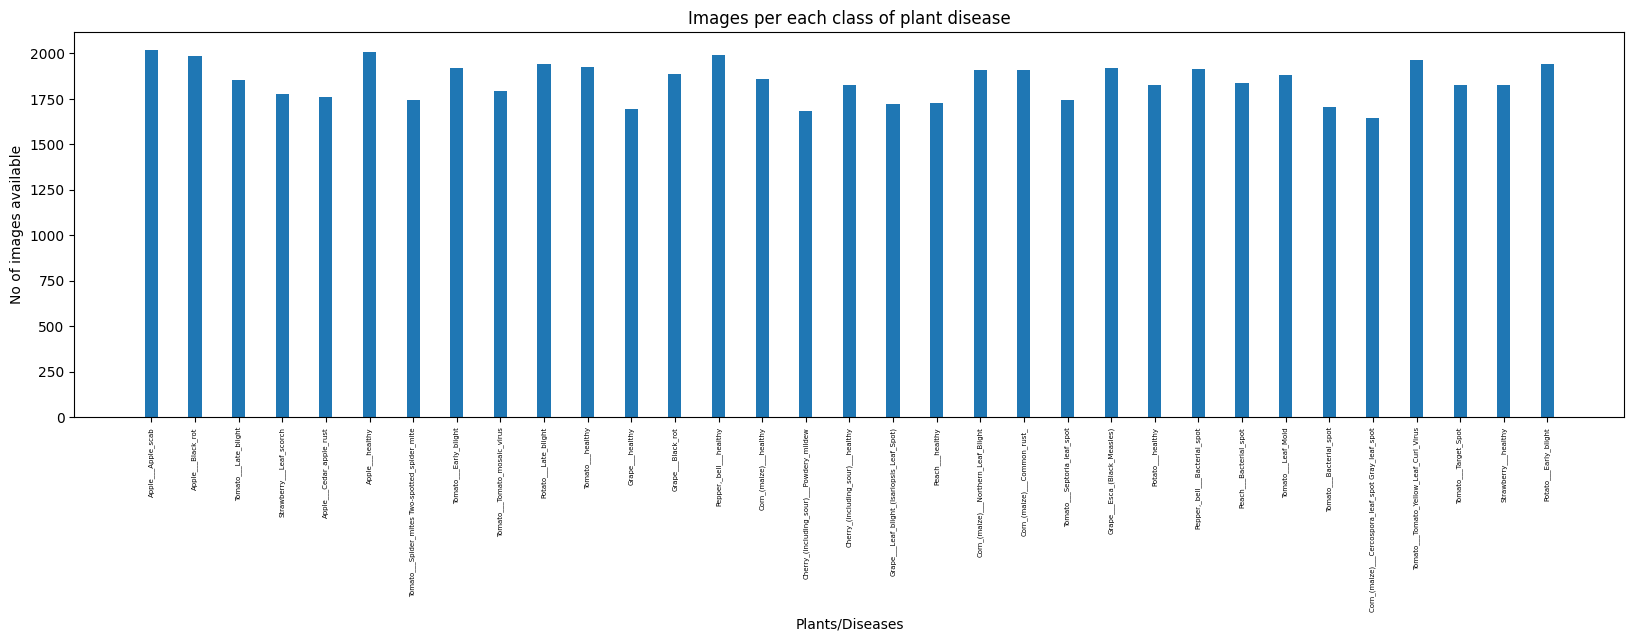

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(33)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [74]:
#plants1 = []
#each plant has which diseases
plantdis={}
NumberOfDiseases = 0
for plant in diseases:

    if plant.split('___')[0] not in list(plantdis.keys()):

        plantdis[plant.split('___')[0]]=[]
    if plant.split('___')[1] != 'healthy':
        plantdis[plant.split('___')[0]].append(plant.split('___')[1])
print(plantdis)

{'Apple': ['Apple_scab', 'Black_rot', 'Cedar_apple_rust'], 'Tomato': ['Late_blight', 'Spider_mites Two-spotted_spider_mite', 'Early_blight', 'Tomato_mosaic_virus', 'Septoria_leaf_spot', 'Leaf_Mold', 'Bacterial_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Target_Spot'], 'Strawberry': ['Leaf_scorch'], 'Potato': ['Late_blight', 'Early_blight'], 'Grape': ['Black_rot', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Esca_(Black_Measles)'], 'Pepper,_bell': ['Bacterial_spot'], 'Corn_(maize)': ['Northern_Leaf_Blight', 'Common_rust_', 'Cercospora_leaf_spot Gray_leaf_spot'], 'Cherry_(including_sour)': ['Powdery_mildew'], 'Peach': ['Bacterial_spot']}


In [114]:
from torchvision import transforms

In [115]:
train_transform = transforms.Compose([
    transforms.ToTensor()
    ])

valid_transform = transforms.Compose([
    transforms.ToTensor()
    ])

In [116]:
from torchvision.datasets import ImageFolder  # for working with classes and images

In [117]:
# datasets for validation and training
train = ImageFolder(train_dir, transform= train_transform)
valid = ImageFolder(valid_dir, transform= valid_transform)

In [ ]:
#first image size and label (3 in [3,256,256]->rgb) # label has only class value no bounding box value
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [ ]:
def check_same_image_size(dataset):
    # Get the size of the first image in the dataset
    first_img_size = dataset[0][0].shape

    # Iterate through the rest of the dataset to compare image sizes
    for i in range(1, len(dataset)):
        img, _ = dataset[i]
        img_size = img.shape

        # Compare the size of the current image with the first image
        if img_size != first_img_size:
            return False

    # If all images have the same size, return True
    return True

In [ ]:
# Assuming you have created 'train_dataset' or 'valid_dataset' as shown in previous code.

# Check if all images in the training dataset have the same size
result = check_same_image_size(train)
print("All images in the dataset have the same size:", result)

KeyboardInterrupt: ignored

In [ ]:
# Assuming you have created 'train_dataset' or 'valid_dataset' as shown in previous code.

# Check if all images in the training dataset have the same size
result = check_same_image_size(valid)
print("All images in the dataset have the same size:", result)

In [21]:
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model


%matplotlib inline

In [22]:
use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")

Using CUDA


In [23]:
import tensorflow as tf
#import tensorflow.keras.backend as K
#from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from keras.layers import MaxPool2D

In [121]:
train = "/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid = "/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

In [122]:
train

'/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'

In [123]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(train,
    class_mode='categorical', batch_size=32, target_size=(224, 224))
test_it = datagen.flow_from_directory(valid,
        class_mode='categorical', batch_size=32, target_size=(224, 224))

Found 60930 images belonging to 33 classes.
Found 15231 images belonging to 33 classes.
CPU times: user 1.09 s, sys: 105 ms, total: 1.19 s
Wall time: 1.15 s


In [124]:
target_names=train_it.class_indices
print(target_names);print()
print('len(target_names',len(target_names))

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Peach___Bacterial_spot': 14, 'Peach___healthy': 15, 'Pepper,_bell___Bacterial_spot': 16, 'Pepper,_bell___healthy': 17, 'Potato___Early_blight': 18, 'Potato___Late_blight': 19, 'Potato___healthy': 20, 'Strawberry___Leaf_scorch': 21, 'Strawberry___healthy': 22, 'Tomato___Bacterial_spot': 23, 'Tomato___Early_blight': 24, 'Tomato___Late_blight': 25, 'Tomato___Leaf_Mold': 26, 'Tomato___Septoria_leaf_spot': 27, 'Tomato___Spider_mites Two-spotted_spider_mite': 28, 'Tomato___Target_Spot': 29, 'Tomato___Tomato_Yellow

In [60]:
# define cnn model
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(33, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [61]:
model = define_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
model = models.Sequential()
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(33, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27_input (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256 

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(test_it)
# fit model
history = model.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=test_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model.evaluate(test_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
1905/1905 [==============================] - 1147s 598ms/step - loss: 2.6127 - accuracy: 0.2497 - val_loss: 2.3103 - val_accuracy: 0.3811
Epoch 2/10
1905/1905 [==============================] - 1137s 597ms/step - loss: 1.3228 - accuracy: 0.5749 - val_loss: 1.1503 - val_accuracy: 0.6393
Epoch 3/10
1905/1905 [==============================] - 1134s 595ms/step - loss: 0.7075 - accuracy: 0.7730 - val_loss: 0.9300 - val_accuracy: 0.7360
Epoch 4/10
1905/1905 [==============================] - 1133s 595ms/step - loss: 0.4746 - accuracy: 0.8474 - val_loss: 0.6206 - val_accuracy: 0.8082
Epoch 5/10
1905/1905 [==============================] - 1132s 594ms/step - loss: 0.3693 - accuracy: 0.8801 - val_loss: 0.3681 - val_accuracy: 0.8864
Epoch 6/10
1905/1905 [==============================] - 1132s 594ms/step - loss: 0.2702 - accuracy: 0.9113 - val_loss: 0.3815 - val_accuracy: 0.8848
Epoch 7/10
1905/1905 [==============================] - 1132s 594ms/step - loss: 0.2243 - accuracy: 0.9274

In [ ]:
model.save('VGG16_model1.h5')